## Before you start working on the exercise

- Use Python version 3.7 up to 3.9. Make sure not to use Python 3.10
- It is highly recommended to create a virtual environment for this course. You can find resources on how to create a virtual environment on the ISIS page of the course.
- Make sure that no assertions fail or exceptions occur, otherwise points will be subtracted.
- Use all the variables given to a function unless explicitly stated otherwise. If you are not using a variable you are doing something wrong.
- Read the **whole** task description before starting with your solution.
- After you submit the notebook more tests will be run on your code. The fact that no assertions fail on your computer locally does not guarantee that you completed the exercise correctly.
- Please submit only the notebook file with its original name. If you do not submit an `ipynb` file you will fail the exercise.
- Edit only between YOUR CODE HERE and END YOUR CODE.
- Verify that no syntax errors are present in the file.
- Before uploading your submission, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel\Restart) and then run all cells (in the menubar, select Cell\Run All).

In [1]:
import sys

if (3,7) <= sys.version_info[:2] <= (3, 9):
    print("Correct Python version")
else:
    print(f"You are using a wrong version of Python: {'.'.join(map(str,sys.version_info[:3]))}")

Correct Python version


$$\Large\textbf{Python Programming for Machine Learning}$$

<br>

$$\Large\textbf{Exam}$$
<hr>

<img src='tu_logo.png' width='200'>
<br>

$$\text{Department of Intelligent Data Analysis and Machine Learning}$$

<br>
$${28\text{th of November}\> 2022}$$

<hr>

### Read before starting with the exam !

The exam has a similar format to the exercise sheets you completed throught the course.

Each exercise consists of: 
- Explanation 
- Implementation
- Overwrite

The overwrite part means that after your function has been tested the expected value will be placed in the corresponding variables, so that if you get stuck you can continue with the next exercise.

For each exercise there will be a maximum number of loops allowed. If your function contains more loops than allowed, you will be notified during the function definition, and the function will automatically fail in the hidden tests. Note that "unrolling a loop" (repeating a line many times) is also considered a loop.

For technical reasons the following functions are **banned** throughout the notebook.

- map
- sum (but np.sum is allowed)
- filter
- np.vectorize
- np.fromiter
- np.fromfunction
- np.apply_along_axis

If you use one of these functions in your solution will **not** get any points.

**Important:** 
   
- Execute every cell in the notebook. You may also try to restart your kernel and execute all cells, in case something went wrong.

- If you were not able to implement one function you may proceed with a next execise by using data generated from the _expected_ output functions.

<hr>

### Personal student information

In the following cell fill in your **real** personal information. Make sure that the code compiles. This information may be used later for you class certificates.

In [2]:
NAME = "Naveed Ul"  # your first name
MID_NAME = ""  # your middle or empty string ''
SURNAME = "Mustafa"  # your last name

MATRICULATION_NUMBER = -10*9308  # e.g. 412342 as integer

HOME_UNIVERSITY = "TU Berlin"  # e.g. TU Berlin, HU Berlin, Uni Potsdam, etc...
MODULE_NAME = "ML1X"  # e.g CA, ML-1, ML-2, Standalone
COURSE_OF_STUDY = "MSC"  # e.g. Mathematics, Computer Sciences, Physic, etc...
DEGREE = "SC"  # e.g. Erasmus, Bachelor, Diplom, Master, PhD or Guest (all others)

In [3]:
from IPython.display import Markdown as md

md(
    f"## Hello {NAME} {MID_NAME} {SURNAME} \n"
    f"### Your matriculation number is {MATRICULATION_NUMBER} \n"
    f"### You study at {HOME_UNIVERSITY} {COURSE_OF_STUDY} {DEGREE} \n"
    f"### Module name: {MODULE_NAME}\n"
    "## [zoom exam room](https://tu-berlin.zoom.us/j/67524239950?pwd=WThJNHZCT3pJbTdIVEZ3L0xKZ0s3Zz09)\n"
    "## password: 068961"
)

## Hello Naveed Ul  Mustafa 
### Your matriculation number is -93080 
### You study at TU Berlin MSC SC 
### Module name: ML1X
## [zoom exam room](https://tu-berlin.zoom.us/j/67524239950?pwd=WThJNHZCT3pJbTdIVEZ3L0xKZ0s3Zz09)
## password: 068961

In [4]:
from IPython.core.display import HTML

HTML(
    """
<style>
.output_png {
    display: table-cell;
    text-align: center;
    margin:auto;
}
.prompt 
    display:none;
}
</style>
"""
)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)


import minified
from minified import max_allowed_loops
overwrite = minified.overwrite()

from unittest import TestCase
t = TestCase()

In this exam you want to write an algorithm that finds a function $f(x)$ that closely represents two dimensional data.

* You do not need to understand how this algorithm works to complete these tasks. It is sufficient to read the bullet points to know what you _have to_ implement. The longer task descriptions explain what is happening.

* There are no loops allowed in _any_ of the excercises.

# $\textbf{Exercise 1: } \text{Creating the dataset (44 Points})$
 
In the first excercise you want to generate two dimensional data on which you can train and test your algorithm. You will first generate the x- and y-coordinates, split your data into train and test sets, and plot both of them.

<hr>

### Exercise 1.1: Generate x-coordinates of the datapoints ( 6 points ) 

<hr>

First you will generate the x-coordinates using a uniform distribution. Since the y-coordinates will follow a specific pattern, their order will be relevant. Therefore you will need to return the x-coordinates in ascending order.

* Draw $N=500$ samples from the uniform distribution in the range $[ -4\pi, 2\pi )$.

$$\Large{
x \sim \mathcal{U}niform[-4\pi, 2\pi),\quad x \in \mathbb{R}^{N}
}$$

* Return $x$ sorted is ascending order.


* Loops allowed in this excercise: 0

In [6]:
@max_allowed_loops(0)
def generate_x(n_samples: int) -> np.ndarray:
    '''
    Create a np.ndarray vector containing `n_samples` sorted values drawn 
    from a uniform distribution in [-4π, 2π).
    '''
    # YOUR CODE HERE
    min_val = -4*np.pi
    max_val = 2*np.pi
    no_of_samples = n_samples 
    x = np.linspace(min_val, max_val, no_of_samples)           # the x values of the data - 500 samples from -4pi to 2pi of equal distance
    # YOUR CODE HERE
    
    return x

In [7]:
n_samples = 500

x = generate_x(n_samples)
print(x[[0,1,2,3,4,-5,-4,-3,-2,-1]])
# running function again should yield different results
x2_size = n_samples + 10
x2 = generate_x(x2_size)

def check_x(x, size):
    assert x.shape == (size,)
    t.assertTrue(np.all(x >= - 4 * np.pi))
    t.assertTrue(np.all(x <= 2 * np.pi))
    np.testing.assert_array_equal(np.diff(x) >= 0, True, 'output is not sorted')
    


assert (x != x2[:n_samples]).mean() > 0.95
check_x(x, n_samples)
check_x(x2, x2_size)

[-12.56637061 -12.52859595 -12.49082129 -12.45304663 -12.41527197
   6.13208666   6.16986132   6.20763598   6.24541065   6.28318531]


In [8]:
x = overwrite.ex1()
x.shape, x[:10], x[-10:]

((500,),
 array([-12.53686908, -12.46258875, -12.421907  , -12.37540229,
        -12.3457062 , -12.33256004, -12.32872446, -12.22695504,
        -12.20604072, -12.12619397]),
 array([5.92480583, 5.93064377, 5.97257239, 5.98184053, 5.98367188,
        6.00024699, 6.05766858, 6.14778591, 6.16723017, 6.19718451]))

### Exercise 1.2: Generate y-values of the datapoints ( 10 points ) 

<hr>

Since you want to simulate the behavior of the data that has a true function $f(x)$ to represent it, you need to define that function $f(x)$. Even though you will later want your algorithm to find a polynomial function to represent the data, the function you will use to generate it will not be polynomial. That means that there is not one perfect function the algorithm can find, as there would also not be in most real scenarios. Instead you will use sine and cosine functions to generate your data. Since in most real data there is noise, you will need to add normal (Gaussian) noise $\mathcal{E}$ to your data.

In this excercise you want to calculate a y-coordinate for each x-coordinate of your toy dataset.

* Define the actual function $f(x)$ to generate the y-coordinates: 

$$\Large{f(x) = \sin(x) + \cos(\frac x 2)}$$

* Generate some normal (Gaussian) noise $\mathcal{E}$:


$$\Large{
\quad \mathcal{E} \sim \mathcal{N}(0, \sigma=0.5),\quad \mathcal{E} \in \mathbb{R}^{N}
}$$

The noise can be generated using a numpy function. The standard deviation of the noise should be 0.5.

* Calculate the y-coordinates by adding the normal Gaussian noise to $f(x)$:

$$\Large{y = f(x) + \mathcal{E}}$$


* Loops allowed in this excercise: 0

In [9]:
from typing import Tuple, Callable, TypeVar

@max_allowed_loops(0)
def generate_y(
    x: np.ndarray, std: float = 0.5
) -> Tuple[Callable[[np.ndarray], np.ndarray], np.ndarray]:
    """
    Create an output for each sample created in the previous exercise.
    The underlying signal is `sin(x) + cos(x / 2)`. A normal noise with
    a standard deviation as provided in the argument `std` (the mean of the
    noise is 0) is added to the signal. The output of the function is a
    callable (a function) that outputs "clean" values (without noise) from
    the underlying signal, and the calculated noisy values calculated for 
    each sample in `x`.
    """
    # YOUR CODE HERE
    f = lambda x: np.sin(x) + np.cos(x/2)           # the underlying signal
    y = f(x) + np.random.normal(0, std, x.shape)    # the noisy values
    
    # YOUR CODE HERE
    
    return f, y

In [10]:
f, y = generate_y(x, std=0.5)

assert callable(f), "f should behave like a function."
x_test = np.arange(3) * np.pi
np.testing.assert_allclose(f(x_test), [1, 0, -1], atol=1e-5)


def test_y(x, f, y, std):
    assert y.shape == x.shape
    clean_signal_difference = f(x) - y
    np.testing.assert_allclose(np.std(clean_signal_difference), std, atol=1e-1)


test_y(x, f, y, 0.5)

x2 = np.arange(10000)
std2 = 10
f2, y2 = generate_y(x2, std=std2)
test_y(x2, f2, y2, std2)

In [11]:
f, y = overwrite.ex2()

f(10)

-0.26035892542614353

### Exercise 1.3: Split the data into training and test sets ( 10 points ) 

<hr>

You will now need to split up the data into a training and a test set. 

* The train set should contain 80% by default of the data while the test set contains the remaining datapoints.

* Both the train and the test values have to be sorted, in the same way the given dataset is sorted (ascending x-values).

* Return four numpy arrays: The x values of the training set, the y values of the training set, the x values of the test set and the y values of the test set.


* Loops allowed in this excercise: 0

In [12]:
from typing import Tuple

@max_allowed_loops(0)
def split_data_and_sort(
    x: np.ndarray, y: np.ndarray, sp_ratio: float = 0.8
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray,]:
    '''
    Given x & y arrays and a split ratio, split the data in x & y
    into training and test arrays, such that the ratio of the length of the
    train arrays and the original array is as close to `sp_ratio` as possible.
    
    The returned train and test arrays are sorted again such that the x arrays
    are in ascending order, and the association between x and y is kept.
    '''
    # YOUR CODE HERE
    n = len(x)                                 # the number of samples
    n_train = int(n * sp_ratio)         # the number of samples in the training set
    n_test = n - n_train                    # the number of samples in the test set
    x_tr = x[:n_train]
    y_tr = y[:n_train]
    x_te = x[n_train:]
    y_te = y[n_train:]
    # YOUR CODE HERE
    

    return x_tr, y_tr, x_te, y_te

In [13]:
sp_ratio = 0.8
x_tr, y_tr, x_te, y_te = split_data_and_sort(x, y, sp_ratio)

assert np.all(np.diff(x_tr) >= 0), 'x_tr is not sorted'
assert np.all(np.diff(x_te) >= 0), 'x_te is not sorted'

assert len(x_tr) + len(x_te) == len(x)
assert len(y_tr) + len(y_te) == len(y)

assert len(x_tr) == int(sp_ratio * len(x))
assert len(y_tr) == int(sp_ratio * len(y))

assert len(x_te) == int((1 - sp_ratio) * len(x)) + 1
assert len(y_te) == int((1 - sp_ratio) * len(y)) + 1


x_tr2, *_ = split_data_and_sort(x, y, sp_ratio)
#assert np.any(x_tr2 != x_tr)

x_tr3, _, x_te3, _ = split_data_and_sort(x, y, 0.5)
assert len(x_tr3) == len(x_te3)



In [14]:
x_tr, y_tr, x_te, y_te = overwrite.ex3()

### Exercise 1.4: Plot the data ( 18 points ) 

<hr> 

Now lets take a closer look at the data you have generated. You will want to plot both the function $f(x)$ the data represents, as well as the toy data itself. 

* Plot the data in a scatter plot with 50% transparency.

* Plot the function $f(x)$ in a dashed, red line with a linewidth of 4.

* The title for the plot should be dynamic, as it is passed to the function. Set the fontsize of the title to 17.

* Label both the scatter plot as 'data' and the line plot as '$f(x)$'.

* Set the labels of the axes to a fontsize of 14. Those labels are also passed to the plotting function.

* The label of the y-axis should be rotated 90 degrees.


* Loops allowed in this excercise: 0

In [15]:
from typing import Callable, Optional

@max_allowed_loops(0)
def plot_data(
    x: np.ndarray,
    y: np.ndarray,
    f: Callable[[np.ndarray], np.ndarray],
    y_hat: Optional[np.ndarray] = None,
    std: float = 0,
    title: str = "",
    ax=None,
    ylabel: str = "y_values",
    xlabel: str = "x_values",
    show_legend: bool = False,
):
    if ax is None:
        fig, ax = plt.subplots(1, figsize=(12, 5))

    # YOUR CODE HERE
    ax.scatter(x, y, label="data", color="b", alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title("Data")

    ax.plot(x, f(x), label="f(x)", color="r", linewidth=4, alpha=0.8, linestyle="--")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel, rotation=90)
    ax.set_title("f(x)")


    # YOUR CODE HERE
    

    if y_hat is not None:
        ax.plot(x, y_hat, "--", color="g", linewidth=3, alpha=0.8, label="$\hat{f}(x)$")
        ax.fill_between(x, y_hat + std, y_hat - std, color="g", alpha=0.1)

    if show_legend:
        ax.legend(fontsize=16)

    return ax

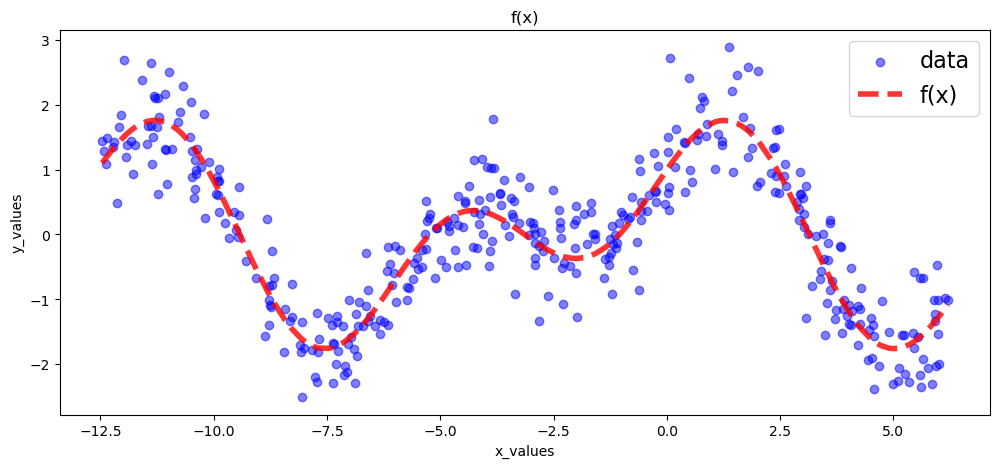

In [16]:
plot_data(x_tr, y_tr, f, title='Scatter plot of the train data', show_legend=True);

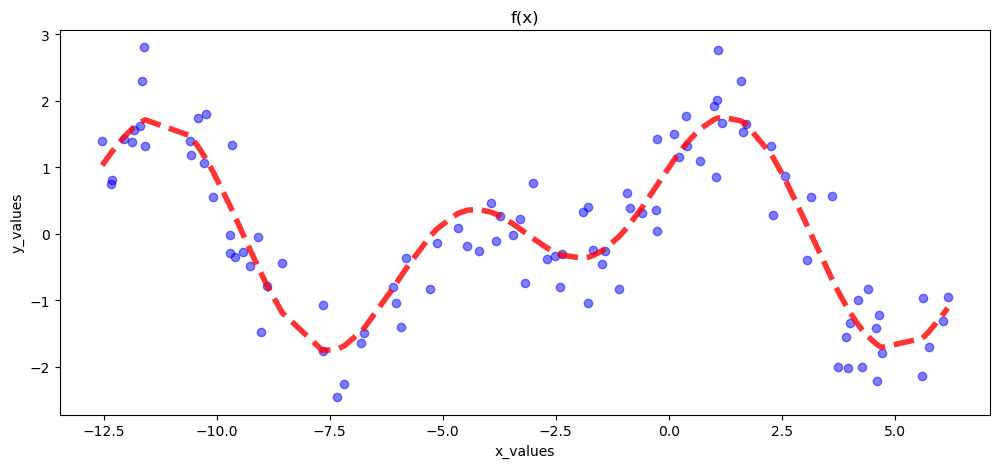

In [17]:
plot_data(x_te, y_te, f, title='Scatter plot of the test data');

### Exercise 1.5: Expected output ( 0 points )

<hr>

If you have done all above tasks correctly, the plots should look like this:

* Compare your plots to the correct ones.

* This gives you a chance to correct obvious mistakes but do not let yourself get stuck here.

* There is no code to write in this excercise.

<img src='./images/scatter_train.png' width=500>
<img src='./images/scatter_test.png' width=500>

# $\textbf{Exercise 2: } \text{Linear Regression (29 Points})$
 
In the second excercise you will write the Linear Regression algorithm to predict the function $\hat{f}(x)$ that fits the data best. The polynomial degree of a function is the greatest exponent of that function. E.g. a function with a polynomial degree of 3 looks like this: $$\hat{f_3}(x) = a + b x^1 + c x^2 + d x^3\quad \mathcal{a,b,c,d} \in \mathbb{R}$$

<hr>

### Exercise 2.1: Calculate the polynomial features of $x$ ( 7 points ) 

<hr>

What you want to do first is to calculate $X$ containing the x-values to the power of $0, 1, 2, ...$ up to to the power of $\text{degree}$. These values are later used to find the parameters they need to be multiplied with to compute $\hat{f}(x)$. This `get_X(x, degree)` needs to be adaptable to a varying degree, as sometimes a function with a polynomial degree of 6 fits better and other times a function with a polynomial degree of 2 is sufficient.

* Compute $X$.

$$d = \text{degree + 1}$$

$$\Large{
X = [x^0, x^1, ...,x^d] \in \mathbb{R}^{(N,d)}, \text{where} \quad x \in \mathbb{R}^{(N,1)}
}$$

* `get_X(x, degree)` needs to work dynamically with every degree it is getting passed.



* Loops allowed in this excercise: 0


In [18]:
@max_allowed_loops(0)
def get_X(x: np.ndarray, degree: int) -> np.ndarray:
    '''
    Calculate all the powers of every input x up to and including `degree`.
    If the input is x=[1,2,3,10], degree=2 the output is:
    [
        [1, 1, 1],
        [1, 2, 4],
        [1, 3, 9],
        [1, 10, 100],
    ]
    '''
    assert degree >= 0
    # YOUR CODE HERE
    n_samples = x.shape[0]
    X = np.ones((n_samples, degree+1))                  # create an array of size (n_samples, degree+1) filled with ones
    X[:, 1:] = x[:, None] ** np.arange(1, degree+1)     # set the values of the second column and higher to the powers of the input x
    # YOUR CODE HERE
    return X

In [19]:
degree = 3
X_tr = get_X(x_tr, degree)
print(X_tr.shape)

assert X_tr.shape == (400, 4)

np.testing.assert_equal(X_tr[:,0], 1)

for i in range(X_tr.shape[1] - 1):
    np.testing.assert_allclose(X_tr[:,i+1] / X_tr[:, i], x_tr)

    
assert get_X(np.random.rand(10), 20).shape == (10,21)



(400, 4)


In [20]:
X_tr = overwrite.ex6()
X_tr.shape


(400, 4)

### Exercise 2.2: Find the W containing the parameters ( 10 points ) 

<hr>

Next you need to find the parameters of your polynomial function. In the example $\hat{f_3}(x) = a + b x^1 + c x^2 + d x^3\quad \mathcal{a,b,c,d} \in \mathbb{R}$ you would want to find $\mathcal{a,b,c,d}$ so that $\hat{f_3}(x)$ fits your data best. To solve this problem you need $y$ to find a vector $W$ so that $\hat{f}(x) = X W$. The value of $\lambda$ regularizes the variance of the model parameters. 

* Calculate W:

$$\Large{
W = (X^{\top}X + \lambda I_d)^{-1}X^{\top}y}, \quad \text{where}\quad X\in \mathbb{R}^{(N,d)}, \quad I_d \in \{0,1\}^{(d,d)}
$$

$$\text{Such that}\quad \forall A : \quad A I = A$$

$$\text{E.g. }d=3, \quad I_3 = \begin{pmatrix}1 & 0 & 0\\\ 0 & 1 & 0 \\\ 0 & 0 & 1  \end{pmatrix}
$$ 


* Loops allowed in this excercise: 0

In [23]:
@max_allowed_loops(0)
def calc_W(X: np.ndarray, y: np.ndarray, lambd: float) -> np.ndarray:
    """
    Calculate the W vector that fits the data `X` into labels `y`, while
    using the regularization parameter `lambd`
    """
    # YOUR CODE HERE
    W = np.linalg.inv(X.T @ X + lambd * np.eye(X.shape[1])) @ X.T @ y   # calculate the W vector - use np.linalg.inv for the inverse of a matrix and np.eye for the identity matrix
    # YOUR CODE HERE
    
    return W

In [24]:
print(X_tr.shape)

W_tr = calc_W(X_tr, y_tr, 1)
W_tr.shape == (4,)
assert 0.109 in W_tr.round(3)

calc_W(np.random.rand(20,7), np.random.rand(20), 0).shape == (7,)


(400, 4)


True

In [ ]:
W_tr = overwrite.ex7()
W_tr.shape


### Exercise 2.3: Compute predictions for the train data ( 2 points ) 

<hr> 

Now that you have both the polynomial features $X$ and the parameters $W$ of your function $\hat{f}(x)$ you can compute your prediction of $\hat{y} = \hat{f}(x)$ for any x-value.

* Compute the predictions for the training data:

$$\Large{\hat{y} = X W}$$


* Loops allowed for this exercise: 0

In [25]:
@max_allowed_loops(0)
def compute_y_hat(X: np.ndarray, W: np.ndarray) -> np.ndarray:
    """
    Evaluate the fitted polynomial encoded in W for all values in X.
    """
    # YOUR CODE HERE
    y_hat = X @ W
    # YOUR CODE HERE
    
    return y_hat

In [26]:
y_hat_tr = compute_y_hat(X_tr, W_tr)

assert len(y_hat_tr.shape) == 1
assert y_hat_tr.shape[0] == X_tr.shape[0]

assert compute_y_hat(np.random.rand(20, 4), np.random.rand(4)).shape == (20,)


In [27]:
y_hat_tr = overwrite.ex8()
y_hat_tr.shape



(400,)

### Exercise 2.4: Linear Regression Class ( 5+5 Points )

It is practical to organize the steps above in one Linear Regression class.

* Define the $\text{LinRegression}$ class and its $\text{train}$ and $\text{predict}$ methods using the functions implemented above.
* The train function computes and stores $W$. To compute $W$ you will also have to compute $X$.
* The predict function computes $\hat{y}$ by first computing $X$ and using the $W$ calculated in the train function.
* If $W$ hasn't been calculated yet, the model is not trained. Throw a `ModelNotTrainedException` in that case.


* Loops allowed for this exercise: 0


_Note_: Even if you haven't been able to implement the functions required, impelement the 
class as if they were available to you. When we check your code we will overwrite the functions with reference implementations.


In [31]:
class ModelNotTrainedException(Exception):
    '''
    Exception to represent when a model has not 
    been trained but it is being used.
    '''
    pass 


In [32]:
class LinRegression(object):
    def __init__(self, degree: int, lambd: float = 1) -> None:
        self.W = None
        self.degree = degree
        self.lambd = lambd

    def __eq__(self, other: "LinRegression") -> bool:
        return (
            self.degree == other.degree
            and self.lambd == other.lambd
            and np.allclose(self.W, other.W)
        )

    def train(self, x: np.ndarray, y: np.ndarray) -> "LinRegression":
        """
        Train the linear regression instance, by calculating the
        polynomial features for all elements in `x` using `get_X`,
        calculating the W polynomial using `calc_W` and then
        storing the W vector in the instance member `self.W`.

        The method returns the calling instance.
        """
        # YOUR CODE HERE
        X = get_X(x, self.degree)           # calculate the polynomial features
        W = calc_W(X, y, self.lambd)   # calculate the W vector
        self.W = W                          # store the W vector in the instance member self.W
        # YOUR CODE HERE
        
        return self

    def predict(self, x) -> np.ndarray:
        """
        Predict the y value for all inputs in x. First the
        polynomial features of all elements in `x` are calculated
        using `get_X`, and then the predictions using `compute_y_hat`.

        If the instance has not been trained, an `ModelNotTrainedException`
        is raised.
        """
        # YOUR CODE HERE
        if self.W is None:                  # check if the model has been trained
            raise ModelNotTrainedException("The model has not been trained yet")
        X= get_X(x, self.degree)            # calculate the polynomial features
        y_hat = compute_y_hat(X, self.W)    # calculate the predictions
        # YOUR CODE HERE

        return y_hat
        

In [33]:
degree = 3
lambd = 0.1
linReg = LinRegression(degree, lambd)
assert linReg.W is None
linRegTrained = linReg.train(x_tr, y_tr)
assert linRegTrained is linReg
assert linReg.W is not None

LinRegression(4, 0).train(
    np.random.rand(20), np.random.rand(20)
).W.shape == (5,)


True

In [34]:
linReg = LinRegression(degree, lambd).train(x_tr, y_tr)

y_hat_te = linReg.predict(x_te)

try:
    linReg = LinRegression(degree, lambd).predict(np.random.rand(10))
except ModelNotTrainedException as error:
    "Your code should throw an exception and get here."
else:
    assert False, "Your function should raise a ModelNotTrainedException."

y_hat_te


array([ 2.8422036 ,  2.53655921,  2.53097588,  2.13661352,  1.90872092,
        1.85398234,  1.69771211,  1.64058403,  1.57307808,  1.54804775,
        0.55584208,  0.53584162,  0.4024413 ,  0.30773606,  0.27307075,
        0.15762906, -0.08261648, -0.09216273, -0.11459476, -0.15539269,
       -0.24535359, -0.32003408, -0.39963639, -0.42500909, -0.47914921,
       -0.59518235, -0.77987418, -0.78015528, -0.80709871, -0.81447405,
       -0.81406688, -0.81129258, -0.7557252 , -0.7489441 , -0.73140042,
       -0.71541153, -0.61209887, -0.57820679, -0.4642797 , -0.40824993,
       -0.33642322, -0.25336714, -0.22127949, -0.19346646, -0.10811626,
       -0.05555661, -0.02311214,  0.03368068,  0.12735638,  0.18578835,
        0.216315  ,  0.2277073 ,  0.3638892 ,  0.39786694,  0.39930628,
        0.42585648,  0.48317723,  0.49740663,  0.5737043 ,  0.60923329,
        0.62453305,  0.67449316,  0.72518472,  0.72860476,  0.73112746,
        0.77523777,  0.78453154,  0.79445321,  0.79649548,  0.80

In [ ]:
y_hat_te = overwrite.ex10()
y_hat_te.shape

# $\textbf{Exercise 3: } \text{Parameter variation (27 Points})$
 
In the third excercise you will use everything you have implemented so far to see how good the predictions of $\hat{f}(x)$ are. You will also check what influence varying polynomial degrees and varying lambda values have on the predictions to find the best parameter setting for this dataset.

<hr>

### Exercise 3.1:  Define the objective function ( 3 points ) 
<hr>

The objective function of Linear Regression is to minimize the sum of the squares of the difference between $y$ and $\hat{y}$ so that we can find the function $\hat{f}(x)$ that is closest to the true model.

* Write the objective function:

$$\Large{\mathcal{L}_{te} = \frac1 2|| y_{te} - \hat{y}_{te} ||_2 = \frac1 2 \sqrt{\sum_{i}(y^{(i)}_{te} - \hat{y}^{(i)}_{te})^2}}
$$


* Loops allowed in this exercise: 0

In [47]:
@max_allowed_loops(0)
def L(y: np.ndarray, y_hat: np.ndarray) -> float:
    """
    Calculate the L2 loss between the predicted and generated values.
    """
    # YOUR CODE HERE
    Loss = np.sqrt(np.sum((y - y_hat)**2)) / 2         # calculate the L2 loss
    # YOUR CODE HERE
    
    return Loss

In [38]:
L_te = L(y_te, y_hat_te)
assert 4.2 < L_te < 4.4

### Exercise 3.2: Compute the standard deviation ( 4 Points )

The standard deviation is an interesting measurement to see how different $y$ and $\hat{y}$ are from each other.

* Compute the standard deviation:

$$\Large{
\sigma = \sqrt{\frac1 n \sum_{i=1}^N(y - \hat{y})^2}
}$$
* Solve this exercise without using `np.std`.


* Loops allowed for this exercise: 0

In [40]:
@max_allowed_loops(0)
def std_(y: np.ndarray, y_hat: np.ndarray) -> float:
    '''
    Calculate the standard deviation of the differences between
    the generated and predicted values.
    '''
    # YOUR CODE HERE
    std = L(y, y_hat)*2 / np.sqrt(y.shape[0])           # calculate the standard deviation
    # YOUR CODE HERE
    
    return std

In [41]:
np.testing.assert_allclose(
    np.std(y_tr - y_hat_tr),
    std_(y_tr, y_hat_tr),
    atol=1e-4,
)

print(std_(y_tr, y_hat_tr))
assert 0.79 < std_(y_tr, y_hat_tr) < 0.80


0.7940781973307877


### Exercise 3.3:  Plotting the test data with different settings ( 15 points )

<hr>

With the test data you can now visualize the impact different degrees and lambdas have on the computed function $\hat{f}(x)$.

* Train a linear regression model for each combination of lambdas and degrees __on the training data__. (The `for` loop is already implemented for you.)
* Predict $\hat{y}$ __for the test data__.
* Calculate the L2 loss (using the `L` function) between $y$ and $\hat{y}$.
* Call the function `plot_data` from Excercise 1.4 and pass `x_te, y_te, f, y_hat, std, title, ax, ylabel, xlabel` and `show_legend` as arguments.


The settings for every subplot that are passed to `plot_data` are:
* Calculate the std of the test data.
* The xlabel is dynamic: '$\lambda$: {lambda}'
* The ylabel is dynamic: 'degree: {degree}'
* The title is dynamic: '$\mathcal{L}_{te}: $ {L_te}'


* Loops allowed in this exercise: 0

Implementing this function requires a loop for iterating over the parameter combinations, but the part you have to fill in does not require any loops.

In [42]:
from itertools import product
from typing import Iterable, Tuple


@max_allowed_loops(1)
def plot_test_data_fitting(
    degrees: Iterable[int],
    lambdas: Iterable[float],
    std: float = 0,
    fs: Tuple[int, int] = (20, 20),
    show_legend: bool = False,
):

    fig, axis = plt.subplots(
        len(degrees), len(lambdas), sharex=True, sharey=True, figsize=fs, squeeze=False
    )
    for (n, degree), (k, lambd) in product(enumerate(degrees), enumerate(lambdas)):
        ax = axis[n, k]

        # YOUR CODE HERE
        linReg = LinRegression(degree, lambd).train(x_tr, y_tr)   # train the model
        y_hat = linReg.predict(x_te)                             # predict the values
        
        ax.scatter(x_tr, y_tr, label="Training data", color="blue")   # plot the training data
        ax.scatter(x_te, y_te, label="Test data", color="red")        # plot the test data
        ax.plot(x_te, y_hat, label="Fitted model", color="green")     # plot the fitted model

        ax.set_title(f"Degree: {degree}, Lambda: {lambd}")           # set the title
        ax.set_xlabel("x")                                           # set the x label
        ax.set_ylabel("y")                                           # set the y label
        ax.legend()                                                  # show the legend

        tight_layout = True
        # YOUR CODE HERE
        

    fig.tight_layout()

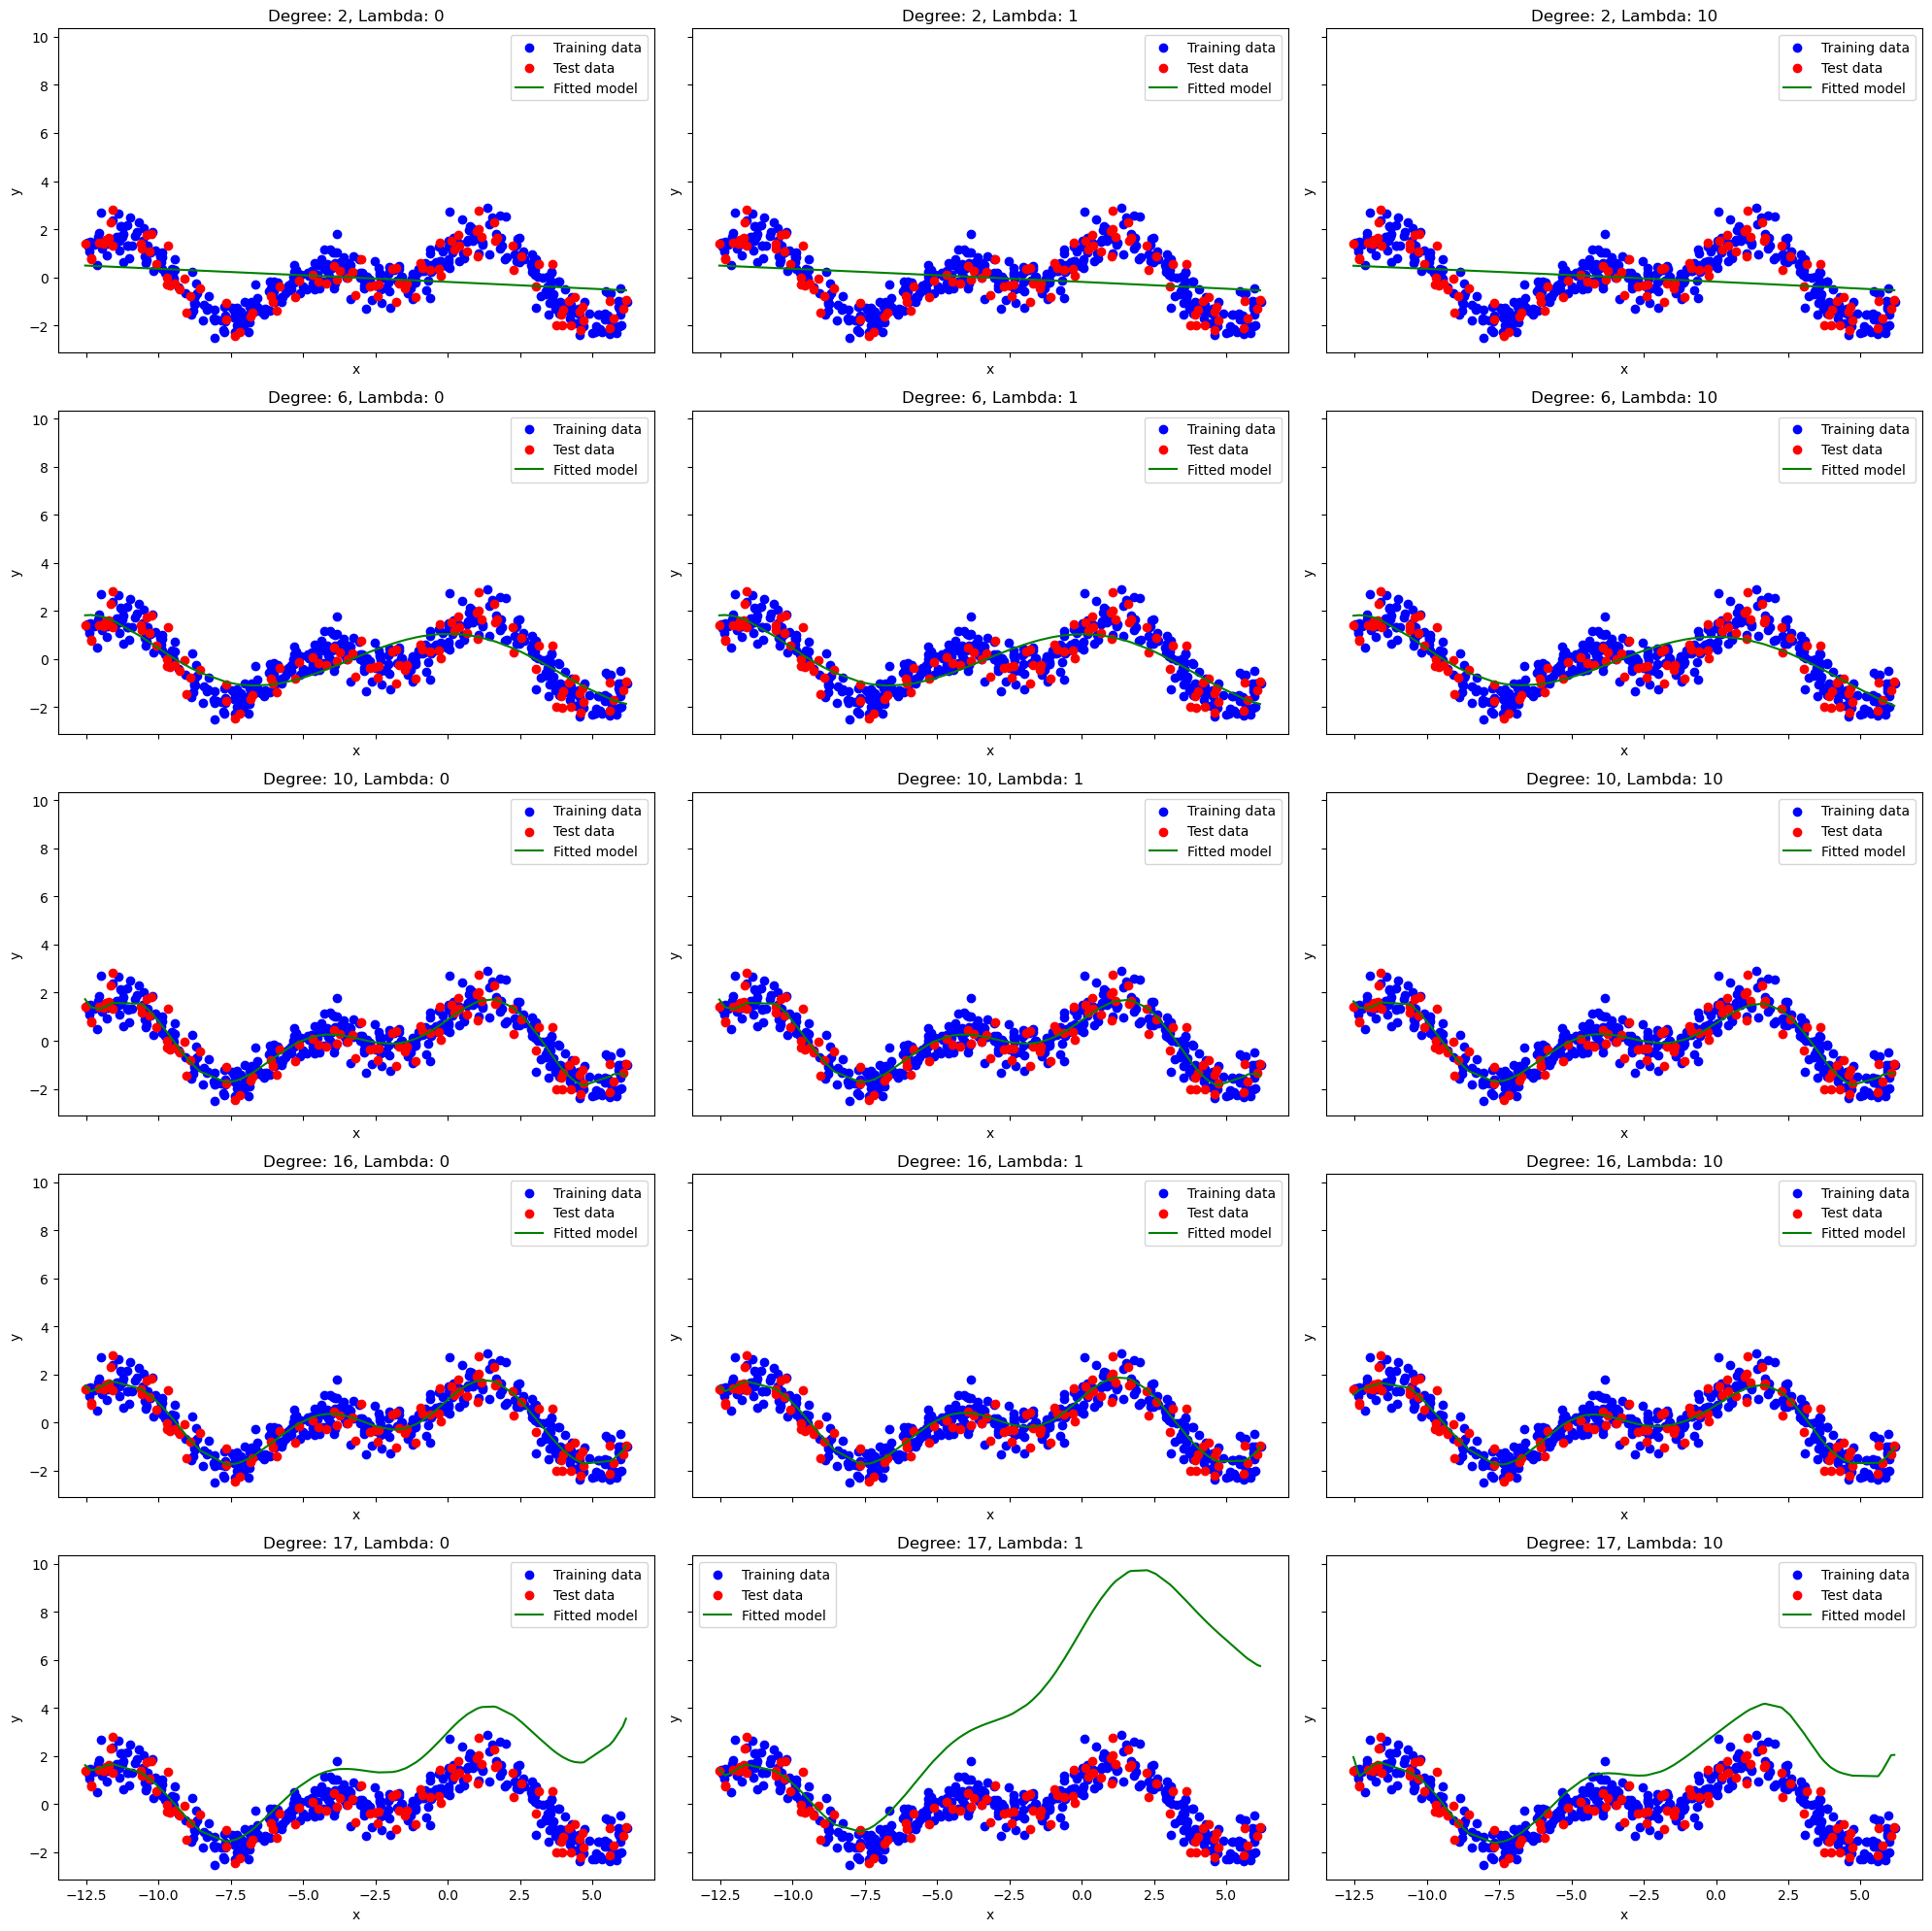

In [43]:
degrees = [2, 6, 10, 16, 17]
lambdas = [0, 1, 10]

plot_test_data_fitting(degrees, lambdas)

### Exercise 3.4: Expected output ( 0 points )

<hr>

If you have done all above tasks correctly, the plots should look like this:

* Compare your plots to the correct ones.

* This gives you a chance to correct obvious mistakes but do not let yourself get stuck here.

* There is no code to write in this excercise.

<img src='./images/fitting.png' width=1000>

### Exercise 3.5: Grid search of the parameters ( 5 points )

<hr>

Now that you have a way to rate how far $y$ is from $\hat{y}$ (the objective function $L$), you can try different combinations of degrees and lambdas to find the ideal parameters.

* Use the functions and classes you have implemented up to this point.
* Train a linear regression model for each combination of lambdas and degrees __on the training data__.
* Predict $\hat{y}$ __for the test data__.
* Calculate the L2 loss (using the `L` function) between $y$ and $\hat{y}$.
* Return the best loss corresponding model for the best combination of degree and lambda. 


* Number of loops allowed in this exercise: 0

Implementing this function requires a loop for iterating over the parameter combinations, but the part you have to fill in does not require any loops.

In [44]:
degrees = np.arange(2, 20)
lambdas = [0, 1, 10, 100]

In [50]:
from itertools import product
from typing import Iterable


@max_allowed_loops(1)
def grid_search(
    degrees: Iterable[int],
    lambdas: Iterable[float],
    x_tr: np.ndarray,
    y_tr: np.ndarray,
    x_te: np.ndarray,
    y_te: np.ndarray,
) -> Tuple[LinRegression, float]:
    """
    Find the best hyperparameters for a linear regression model. For each
    hyperparameter combination, train the model using the training data
    and calculate the loss using the test data. If the trained model is
    the best one trained so far according to the loss metric, store it.

    Finally return the best linear regression model along with its test
    loss.
    """

    best_L = float("inf")
    best_linReg = None

    for lambd, degree in product(lambdas, degrees):
        # YOUR CODE HERE
        linReg = LinRegression(degree, lambd).train(x_tr, y_tr)   # train the model
        y_hat = linReg.predict(x_te)                             # predict the values
        loss = L(y_te, y_hat)                                       # calculate the loss
        if loss < best_L:                                           # check if the loss is the best one
            best_L = loss                                           # update the best loss
            best_linReg = linReg                                 # update the best model
        else:
            pass
        # YOUR CODE HERE
        

    return best_linReg, best_L

In [51]:
best_linReg, best_L = grid_search(degrees, lambdas, x_tr, y_tr, x_te, y_te)
print(best_L)
assert best_linReg.W is not None
assert 2.5 < best_L < 2.6


2.564148422358019


In [52]:
print(f'Best degree: {best_linReg.degree}')
print(f'Best lambda: {best_linReg.lambd}')
print(f'Best L: {best_L:0.3f}')

Best degree: 16
Best lambda: 0
Best L: 2.564


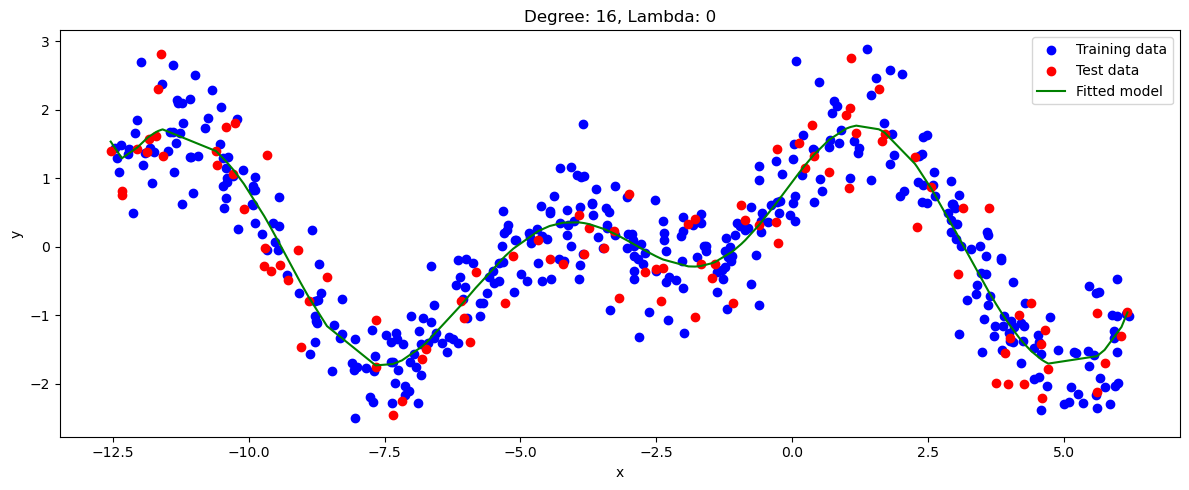

In [53]:
plot_test_data_fitting([best_linReg.degree], [best_linReg.lambd], fs=(12,5), show_legend=True)